#Machine Learning Applied in the Evaluation of Airport Projects# 
#SITRAER 2022#

Universidade Federal de Pernambuco (UFPE)

Data: Agosto / 2022

Autores:
*   Ítalo Guedes - italo.guedes@ufpe.br
*   Max Andrade - max.andrade@ufpe.br 
*   Cleber Zanchettin - cz@cin.ufpe.br 



#Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report


#Importação do Dataset (Excel)

In [ ]:
df = pd.read_csv('/content/sample_data/DATASET_TPS_.csv', delimiter=';')
df.head()

,largura_check-in,comprimento_check-in,largura_fila embarque,comprimento_fila embarque,status
0,4.0,5.0,7.0,11.0,NÃO APTO
1,5.0,2.0,6.0,20.0,NÃO APTO
2,8.0,3.0,3.0,25.0,NÃO APTO
3,15.0,2.0,3.0,11.0,NÃO APTO
4,13.0,5.0,7.0,21.0,APTO


#Visualização dos Dados

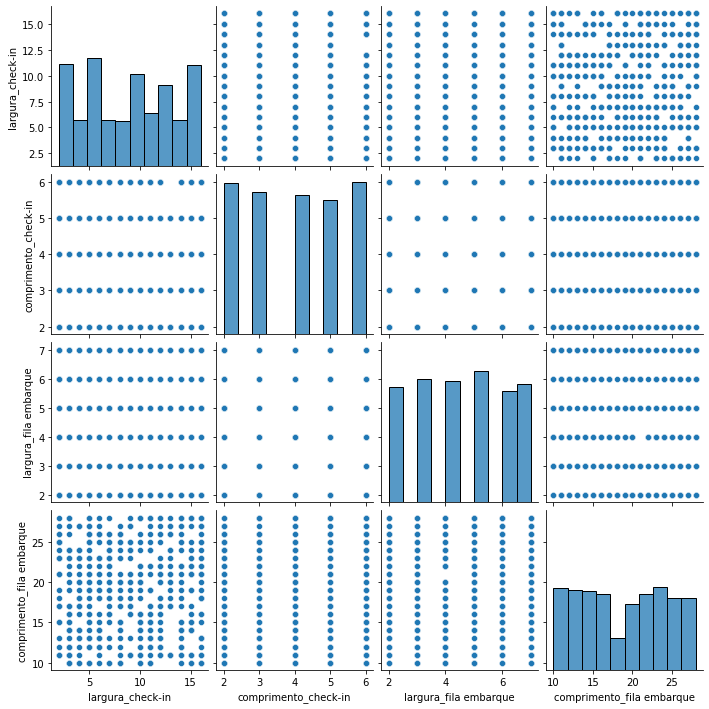

In [ ]:
sns.pairplot(df)
plt.show()

#Pré-processamento *inputs*

In [ ]:
X = df.drop('status', axis=1)
y = df.status
X

,largura_check-in,comprimento_check-in,largura_fila embarque,comprimento_fila embarque
0,4.0,5.0,7.0,11.0
1,5.0,2.0,6.0,20.0
2,8.0,3.0,3.0,25.0
3,15.0,2.0,3.0,11.0
4,13.0,5.0,7.0,21.0
...,...,...,...,...
495,8.0,4.0,3.0,13.0
496,6.0,3.0,6.0,11.0
497,9.0,2.0,2.0,16.0
498,16.0,6.0,6.0,13.0


#Convertendo *inputs* categóricos

In [ ]:
df2 = pd.read_csv('/content/sample_data/DATASET_TPS_.csv', delimiter=';')
df2.head()

,largura_check-in,comprimento_check-in,largura_fila embarque,comprimento_fila embarque,status
0,4.0,5.0,7.0,11.0,NÃO APTO
1,5.0,2.0,6.0,20.0,NÃO APTO
2,8.0,3.0,3.0,25.0,NÃO APTO
3,15.0,2.0,3.0,11.0,NÃO APTO
4,13.0,5.0,7.0,21.0,APTO


In [ ]:
X = df2.drop('status', axis=1)
y = df2.status
y

0      NÃO APTO
1      NÃO APTO
2      NÃO APTO
3      NÃO APTO
4          APTO
         ...   
495        APTO
496    NÃO APTO
497    NÃO APTO
498        APTO
499        APTO
Name: status, Length: 500, dtype: object

In [ ]:
pd.get_dummies(y)

,APTO,NÃO APTO
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
495,1,0
496,0,1
497,0,1
498,1,0


#Separando *inputs* e *outputs*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm

array([[0.14285714, 0.75      , 1.        , 0.05555556],
       [0.21428571, 0.        , 0.8       , 0.55555556],
       [0.42857143, 0.25      , 0.2       , 0.83333333],
       ...,
       [0.5       , 0.        , 0.        , 0.33333333],
       [1.        , 1.        , 0.8       , 0.16666667],
       [0.57142857, 0.5       , 0.6       , 0.27777778]])

#Implementando o algoritmo SVM

In [ ]:
from sklearn.svm import SVC

#Treinando o classificador SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#criando variáveis
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=2/3, random_state=1)

#Separando conjunto de treino e teste

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

#Acurácia algoritmo SVM

In [ ]:
accuracy_score(y_test, svc.predict(X_test))

0.9520958083832335

In [ ]:
resultado_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, resultado_svc))

              precision    recall  f1-score   support

        APTO       0.96      0.93      0.94        70
    NÃO APTO       0.95      0.97      0.96        97

    accuracy                           0.95       167
   macro avg       0.95      0.95      0.95       167
weighted avg       0.95      0.95      0.95       167



#Avaliando a acurácia do algoritmo SVM

#Avaliando o classificador (a partir de um novo projeto)

In [ ]:
novo_projeto = [[2.00, 3.00, 20.00, 3.00]]
normalizador.transform(novo_projeto)
X_new = normalizador.transform(novo_projeto)
X_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.        ,  0.25      ,  3.6       , -0.38888889]])

In [ ]:
svc.predict(X_new)

array(['NÃO APTO'], dtype=object)